In [1]:
##imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
##Data Loading
eqData = pd.read_csv('EDSAssignment.csv', parse_dates=['date'])
eqData['price/epsNTM'] = eqData['price']/eqData['epsNtm']
eqData['entrVal/ebitdaNTM'] = eqData['entrVal']/eqData['ebitdaNtm']
eqData['entrVal/salesNTM'] = eqData['entrVal']/eqData['salesNtm']
eqData = eqData.set_index(['ticker_exchange', 'date'], drop=True)

In [3]:
def pxRetHist(metric, value, timeframe, bins = 50, eqData = eqData):
    ''' Returns a histogram (dataframe) of the price returns for selected stocks -
        metric : string - factor used to select the stock universe
        value : float - threshold for the metric 
        timeframe : int - monthly timeperiod for return calculation
        bins : int - number of bins to classify our data into
    '''
    if metric not in eqData.columns:
        raise ValueError('Metric not in data. Please check the spellings!')
    ## Get the stocks/tickers with metric more than the value. 
    inclTickers = set(eqData[eqData[metric]>=value].index.get_level_values('ticker_exchange'))
    ## Get the returns distribution only for the above tickers
    retsDf = []
    for tick in inclTickers:
        px = eqData.loc[tick].resample('1M').last()['price'] #Re-sample to make sure it's monthly data
        rets = (px - px.shift(timeframe))/px.shift(timeframe) #Returns duration depends on timeframe 
        retsDf += list(rets.dropna())
    (num, binInfo, _) = plt.hist(retsDf, bins=bins, label='Return Histogram')
    plt.show()
    result = pd.DataFrame(zip(binInfo[:-1],binInfo[1:],num), columns = ['PX Returns from', 'PX Returns to', 'Frequency'])
    return result

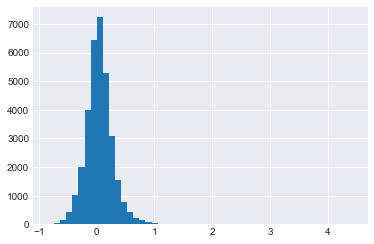

,PX Returns from,PX Returns to,Frequency
0,-0.839663,-0.734466,21.0
1,-0.734466,-0.629268,61.0
2,-0.629268,-0.524071,141.0
3,-0.524071,-0.418874,422.0
4,-0.418874,-0.313677,1021.0
5,-0.313677,-0.208479,2005.0
6,-0.208479,-0.103282,3994.0
7,-0.103282,0.001915,6444.0
8,0.001915,0.107112,7239.0
9,0.107112,0.212310,5302.0


In [4]:
pxRetHist('price/epsNTM', 30, 6)